 
# Capstone Project by Saravana - Airplane Data (Data_Train.xlsx)

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Airlinedata.csv")
#df.head(10)
df.shape
df.describe()

#Changing the column type from the CSV file to the appropriate data type
#Converting date of journey type to datetime format
df[['Date_of_Journey']] = df[['Date_of_Journey']].apply(pd.to_datetime,format="%d/%m/%Y") 
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"],format='%H:%M')
df.info()

#Handling missing data
print("If any missing data = ",df.isnull().sum()) # Only total stops and route has one null data. We can ignore it
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 918.2+ KB
If any missing data =  Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep

In [168]:
#Finding Mean, Median, STD for price and duration columns

df["DurationV2"] = pd.to_timedelta(df["Duration"]) #Creating additional field in the dataframe called DurationV2 and storing the data in Timedelta format
#print(df["Duration"])

#print("Mean of airline durations grouped by Airlines",df.groupby('Airline')["DurationV2"].mean())
#print("Mean of airline Price grouped by Airlines",df.groupby('Airline')["Price"].mean())
#Mean value for Duration, Price 
mn_duration_price = {#'Airline' :df["Airline"].unique()
                     'Mean of Duration' :df.groupby('Airline')["DurationV2"].mean()
                     ,'Mean of Price':df.groupby('Airline')["Price"].mean()
                    ,'Median of Duration':df.groupby('Airline')["DurationV2"].median()
                ,'Median of Price': df.groupby('Airline')["Price"].median()
}


display(pd.DataFrame(mn_duration_price))
#############
print("Mean of all the Airline Duration & Price\n",df[["DurationV2","Price"]].mean())
print("Median of all the Airline Duration & Price\n",df[["DurationV2","Price"]].median())
price_std_dev = df['Price'].std()
duration_std_dev = df['DurationV2'].std()

print("Standard Deviation of Price:", price_std_dev)
print("Standard Deviation of Duration:", duration_std_dev)



#print("Median of airline durations grouped by Airlines",df.groupby('Airline')["DurationV2"].median())
#print("Median of airline Price grouped by Airlines",df.groupby('Airline')["Price"].median())
###############
#print(df.groupby('Airline')["DurationV2"].mean())
#print(df["Price"].mean())
#print((df["DurationV2"].median()))
#df[["DurationV2","Price"]].mean()
df.info()

,Mean of Duration,Mean of Price,Median of Duration,Median of Price
Airline,,,,
Air Asia,0 days 05:48:16.551724137,5590.260188,0 days 02:50:00,5162.0
Air India,0 days 15:43:15.205479452,9611.210616,0 days 15:55:00,9443.0
GoAir,0 days 04:58:58.144329896,5861.056701,0 days 05:10:00,5135.0
IndiGo,0 days 04:45:24.403312226,5673.682903,0 days 02:55:00,5000.0
Jet Airways,0 days 14:09:44.021823850,11643.923357,0 days 13:20:00,11467.0
Jet Airways Business,0 days 06:26:40,58358.666667,0 days 06:10:00,54747.0
Multiple carriers,0 days 10:25:46.153846153,10902.678094,0 days 10:15:00,10197.0
Multiple carriers Premium economy,0 days 10:06:32.307692307,11418.846154,0 days 10:20:00,11269.0
SpiceJet,0 days 02:58:29.046454767,4338.284841,0 days 02:30:00,3873.0


Mean of all the Airline Duration & Price
 DurationV2    0 days 10:43:05.593934288
Price                       9087.064121
dtype: object
Median of all the Airline Duration & Price
 DurationV2    0 days 08:40:00
Price                  8372.0
dtype: object
Standard Deviation of Price: 4611.35916681709
Standard Deviation of Duration: 0 days 08:27:51.720052914
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          10683 non-null  object         
 1   Date_of_Journey  10683 non-null  datetime64[ns] 
 2   Source           10683 non-null  object         
 3   Destination      10683 non-null  object         
 4   Route            10682 non-null  object         
 5   Dep_Time         10683 non-null  datetime64[ns] 
 6   Arrival_Time     10683 non-null  object         
 7   Duration         10683 non-null  object   

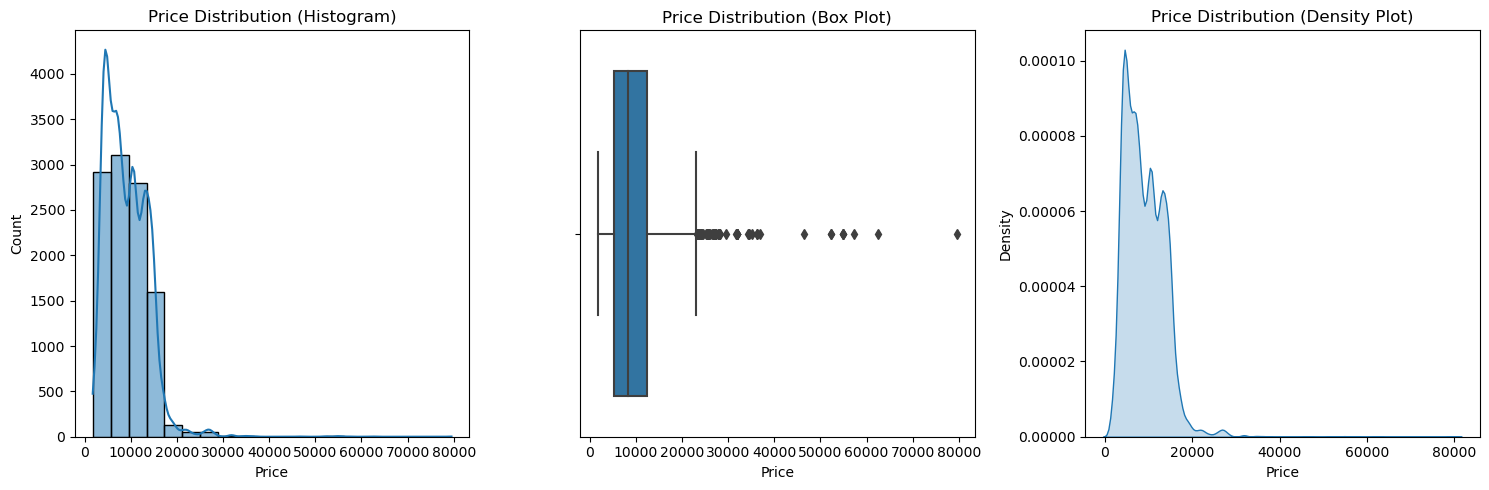

In [115]:
#Visualization of the ticket prices
ticket_prices = df["Price"]
#plt.hist(ticket_prices)
#plt.title("Distribution of ticket prices")
#plt.xlabel("Ticket Price")
#plt.ylabel("Frequency")
#plt.figure(figsize=(10, 6))
#sns.histplot(data=df,x=ticket_prices)
#plt.title("Distribution of ticket prices")
#plt.xlabel("Ticket Price")
#plt.ylabel("Frequency")
#plt.show()

plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Price', bins=20, kde=True)
plt.title('Price Distribution (Histogram)')

# Box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Price')
plt.title('Price Distribution (Box Plot)')

# Density plot
plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x='Price', fill=True)
plt.title('Price Distribution (Density Plot)')

plt.tight_layout()
plt.show()

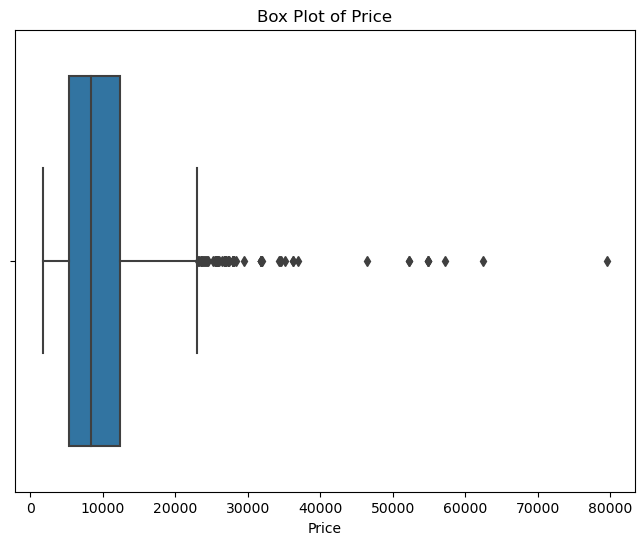

Outliers found using IQR method:
                    Airline Date_of_Journey    Source Destination  \
123               Air India       1/03/2019     Delhi      Cochin   
396       Multiple carriers       1/03/2019     Delhi      Cochin   
486             Jet Airways      01/03/2019  Banglore   New Delhi   
510             Jet Airways      01/03/2019  Banglore   New Delhi   
597               Air India       6/03/2019    Mumbai   Hyderabad   
...                     ...             ...       ...         ...   
10353           Jet Airways       6/03/2019    Mumbai   Hyderabad   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   
10383           Jet Airways      01/03/2019  Banglore   New Delhi   
10439           Jet Airways      01/03/2019  Banglore   New Delhi   
10511             Air India      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
123          DEL → BOM → COK    23:00  19:15 02 Mar  20h 15m  

In [118]:
#Finding Outliers using IQR Method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers using IQR method
outliers_iqr = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]

# Find outliers using box plot visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Price')
plt.title('Box Plot of Price')
plt.show()

# Display outliers found using IQR method
print("Outliers found using IQR method:")
print(outliers_iqr)

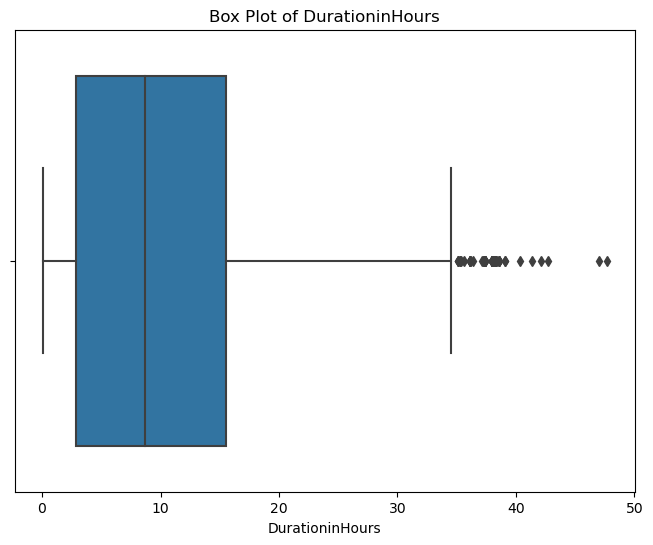

Outliers found using IQR method for Duration in hours:
           Airline Date_of_Journey    Source Destination  \
226    Jet Airways       3/03/2019     Delhi      Cochin   
553      Air India       9/03/2019     Delhi      Cochin   
919      Air India      12/05/2019   Kolkata    Banglore   
925    Jet Airways       6/03/2019     Delhi      Cochin   
966      Air India      21/05/2019     Delhi      Cochin   
...            ...             ...       ...         ...   
9848     Air India      01/03/2019  Banglore   New Delhi   
10020    Air India       9/05/2019     Delhi      Cochin   
10326    Air India      03/03/2019  Banglore   New Delhi   
10456  Jet Airways       6/03/2019     Delhi      Cochin   
10639    Air India       3/06/2019     Delhi      Cochin   

                             Route Dep_Time  Arrival_Time Duration  \
226          DEL → IDR → BOM → COK    05:25  18:50 04 Mar  37h 25m   
553          DEL → AMD → BOM → COK    05:00  19:15 10 Mar  38h 15m   
919    CCU → B

In [131]:
#Visualization for Duration and also finding Outliers
df['DurationinHours'] = df["DurationV2"] / pd.Timedelta(hours=1)
#print(df['DurationinHours'])
# Calculate quartiles and IQR for DurationV2
Q1_duration = df['DurationinHours'].quantile(0.25)
Q3_duration = df['DurationinHours'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

# Find outliers using IQR method for Duration in Hours
outliers_iqr_duration = df[(df['DurationinHours'] < (Q1_duration - 1.5 * IQR_duration)) | (df['DurationinHours'] > (Q3_duration + 1.5 * IQR_duration))]

# Find outliers using box plot visualization for Duration in hours
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='DurationinHours')
plt.title('Box Plot of DurationinHours')
plt.show()

# Display outliers found using IQR method for Duration in Hours
print("Outliers found using IQR method for Duration in hours:")
print(outliers_iqr_duration)
